# Preliminaries and Dataframe Construction

In [1]:
# Import modules
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

#Formatting
plt.rcParams['font.family'] = 'Times New Roman'  # Set plt shows font to Times New Roman
plt.rcParams['axes.grid'] = True  # Ensure line graphs display on graphs
sns.set_palette(sns.color_palette('Accent')) #set color palette to a nice seaborn style https://seaborn.pydata.org/tutorial/color_palettes.html

## Survival rates by capacity

In [2]:
stats_overall_All = pd.read_excel('MC-Capacity-results-stats.xlsx', sheet_name='Overall')
stats_race_All = pd.read_excel('MC-Capacity-results-stats.xlsx', sheet_name='Race')
stats_age_All = pd.read_excel('MC-Capacity-results-stats.xlsx', sheet_name='Age Group')
stats_COVID_All = pd.read_excel('MC-Capacity-results-stats.xlsx', sheet_name='COVID Status')

In [3]:
stats_Cho_overall_All = pd.read_excel('MC-Capacity-results-stats.xlsx', sheet_name='Cho_Overall')
stats_Cho_race_All = pd.read_excel('MC-Capacity-results-stats.xlsx', sheet_name='Cho_Race')
stats_Cho_age_All = pd.read_excel('MC-Capacity-results-stats.xlsx', sheet_name='Cho_Age_Group')
stats_Cho_COVID_All = pd.read_excel('MC-Capacity-results-stats.xlsx', sheet_name='Cho_COVID_Status')

In [4]:
#Alternative way of deriving CIs over the parameters derived in the runs - i.e. traditional CIs across the rates in each run.

def get_CIs_rates(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                Survived=pd.NamedAgg(column="Survived", aggfunc="mean"),
                Allocated=pd.NamedAgg(column="Allocated", aggfunc="mean"),
                A_rate=pd.NamedAgg(column="A_rate", aggfunc="mean"),
                A_std=pd.NamedAgg(column="A_rate", aggfunc="std"),
                A_sem=pd.NamedAgg(column="A_rate", aggfunc="sem"),
                S_rate=pd.NamedAgg(column="S_rate", aggfunc="mean"),
                S_std=pd.NamedAgg(column="S_rate", aggfunc="std"),
                S_sem=pd.NamedAgg(column="S_rate", aggfunc="sem"),
            )
            .reset_index()
            .assign(A_rate_CI_lo = lambda df_: df_['A_rate'] - 1.96* df_['A_sem'],
                A_rate_CI_hi = lambda df_:df_['A_rate'] + 1.96* df_['A_sem'],
                S_rate_CI_lo = lambda df_: df_['S_rate'] - 1.96* df_['S_sem'],
                S_rate_CI_hi = lambda df_:df_['S_rate'] + 1.96* df_['S_sem'],
            )
            .set_index(groups)
            .reindex(columns=['Run','Pop_N','Survived','Allocated','A_rate','A_rate_CI_lo','A_rate_CI_hi', 'S_rate', 'S_rate_CI_lo', 'S_rate_CI_hi'])
            .reset_index()
            .round(4) #round all number to two decimal places
    )

#            .drop(df.loc[df_['Protocol']=='Baseline'].index, inplace=True)

def get_CIs_rates_with_AA(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                Survived=pd.NamedAgg(column="Survived", aggfunc="mean"),
                Allocated=pd.NamedAgg(column="Allocated", aggfunc="mean"),
                A_rate=pd.NamedAgg(column="A_rate", aggfunc="mean"),
                A_std=pd.NamedAgg(column="A_rate", aggfunc="std"),
                A_sem=pd.NamedAgg(column="A_rate", aggfunc="sem"),
                S_rate=pd.NamedAgg(column="S_rate", aggfunc="mean"),
                S_std=pd.NamedAgg(column="S_rate", aggfunc="std"),
                S_sem=pd.NamedAgg(column="S_rate", aggfunc="sem"),
                Age_Adj_S_rate=pd.NamedAgg(column="Age_Adj_S_rate", aggfunc="mean"),
                Age_Adj_S_std=pd.NamedAgg(column="Age_Adj_S_rate", aggfunc="std"),
                Age_Adj_S_sem=pd.NamedAgg(column="Age_Adj_S_rate", aggfunc="sem"),
            )
            .reset_index()
            .assign(A_rate_CI_lo = lambda df_: df_['A_rate'] - 1.96* df_['A_sem'],
                A_rate_CI_hi = lambda df_:df_['A_rate'] + 1.96* df_['A_sem'],
                S_rate_CI_lo = lambda df_: df_['S_rate'] - 1.96* df_['S_sem'],
                S_rate_CI_hi = lambda df_:df_['S_rate'] + 1.96* df_['S_sem'],
                Age_Adj_S_rate_CI_lo = lambda df_: df_['Age_Adj_S_rate'] - 1.96* df_['Age_Adj_S_sem'],
                Age_Adj_S_rate_CI_hi = lambda df_:df_['Age_Adj_S_rate'] + 1.96* df_['Age_Adj_S_sem'],
            )
            .set_index(groups)
            .reindex(columns=['Run','Pop_N','Survived','Allocated','A_rate','A_rate_CI_lo','A_rate_CI_hi', 'S_rate', 'S_rate_CI_lo',
                               'S_rate_CI_hi', 'Age_Adj_S_rate','Age_Adj_S_rate_CI_lo','Age_Adj_S_rate_CI_hi'])
            .reset_index()
            .round(4) #round all number to two decimal places
    )

def get_CIs_Cho(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                LE_Total_Cho=pd.NamedAgg(column="LE_Total_Cho", aggfunc="mean"),
                YLL_Cho=pd.NamedAgg(column="YLL_Cho", aggfunc="mean"),
                YLL_Cho_std=pd.NamedAgg(column="YLL_Cho", aggfunc="std"),
                YLL_Cho_sem=pd.NamedAgg(column="YLL_Cho", aggfunc="sem"),
            )
            .reset_index()
            .assign(YLL_Cho_CI_lo = lambda df_: df_['YLL_Cho'] - 1.96* df_['YLL_Cho_sem'],
                YLL_Cho_CI_hi = lambda df_:df_['YLL_Cho'] + 1.96* df_['YLL_Cho_sem']
            )
            .set_index(groups)
            .reindex(columns=['Run','Pop_N', 'LE_Total_Cho', 'YLL_Cho','YLL_Cho_CI_lo','YLL_Cho_CI_hi'])
            .reset_index()
            .round(4) #round all number to two decimal places
    )

##Currently have remove Age-Adjustment since it is hard to interpret in this context.
def get_CIs_Cho_with_AA(df_, groups):
    return (df_
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                LE_Total_Cho=pd.NamedAgg(column="LE_Total_Cho", aggfunc="mean"),
                YLL_Cho=pd.NamedAgg(column="YLL_Cho", aggfunc="mean"),
                YLL_Cho_std=pd.NamedAgg(column="YLL_Cho", aggfunc="std"),
                YLL_Cho_sem=pd.NamedAgg(column="YLL_Cho", aggfunc="sem"),
                #Age_Adj_YLL_Cho_rate=pd.NamedAgg(column="Age_Adj_YLL_Cho_rate", aggfunc="mean"),
                #Age_Adj_YLL_Cho_rate_std=pd.NamedAgg(column="Age_Adj_YLL_Cho_rate", aggfunc="std"),
                #Age_Adj_YLL_Cho_rate_sem=pd.NamedAgg(column="Age_Adj_YLL_Cho_rate", aggfunc="sem"),
            )
            .reset_index()
            .assign(YLL_Cho_CI_lo = lambda df_: df_['YLL_Cho'] - 1.96* df_['YLL_Cho_sem'],
                YLL_Cho_CI_hi = lambda df_:df_['YLL_Cho'] + 1.96* df_['YLL_Cho_sem'],
                #Age_Adj_YLL_Cho_rate_CI_lo = lambda df_: df_['Age_Adj_YLL_Cho_rate'] - 1.96* df_['Age_Adj_YLL_Cho_rate_sem'],
                #Age_Adj_YLL_Cho_rate_CI_hi = lambda df_:df_['Age_Adj_YLL_Cho_rate'] + 1.96* df_['Age_Adj_YLL_Cho_rate_sem'],
            )
            #.round(4) #round all number to two decimal places
            .set_index(groups)
            .reindex(columns=['Run','Pop_N', 'LE_Total_Cho', 'YLL_Cho', 'YLL_Cho_CI_lo', 'YLL_Cho_CI_hi', 'Age_Adj_YLL_Cho_rate','Age_Adj_YLL_Cho_rate_CI_lo','Age_Adj_YLL_Cho_rate_CI_hi'])
            .reset_index()
            .round(4) #round all number to two decimal places
    )

#stats_overall_All_mean = pd.concat([stats_overall_All[(stats_overall_All['Protocol']=='Baseline')], get_CIs_rates(stats_overall_All[stats_overall_All.Protocol != 'Baseline'], ['Protocol'])])
#stats_race_All_mean = pd.concat([stats_race_All[(stats_race_All['Protocol']=='Baseline')], get_CIs_rates_with_AA(stats_race_All[stats_race_All.Protocol != 'Baseline'], ['Protocol', 'Race'])])



Table 4 - Survival at different capacities

In [12]:
with pd.ExcelWriter("MC-All-Table_4_Allocation_Survival.xlsx") as writer:
# use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    # 
    pd.concat([stats_overall_All[(stats_overall_All['Protocol']=='Baseline')], 
               get_CIs_rates(stats_overall_All[stats_overall_All.Protocol != 'Baseline'], ['Capacity','Protocol'])]).to_excel(writer, sheet_name="Overall", index=False)
    pd.concat([stats_race_All[(stats_race_All['Protocol']=='Baseline')], 
               get_CIs_rates_with_AA(stats_race_All[stats_race_All.Protocol != 'Baseline'], ['Capacity', 'Protocol', 'Race'])]).to_excel(writer, sheet_name="Race", index=False)
    pd.concat([stats_age_All[(stats_age_All['Protocol']=='Baseline')], 
               get_CIs_rates_with_AA(stats_age_All[stats_age_All.Protocol != 'Baseline'], ['Capacity', 'Protocol', 'Age_Group'])]).to_excel(writer, sheet_name="Age_Group", index=False)
    pd.concat([stats_COVID_All[(stats_COVID_All['Protocol']=='Baseline')], 
               get_CIs_rates_with_AA(stats_COVID_All[stats_COVID_All.Protocol != 'Baseline'], ['Capacity', 'Protocol', 'COVID_Status'])]).to_excel(writer, sheet_name="COVID_Status", index=False)
    
    pd.concat([stats_Cho_overall_All[(stats_Cho_overall_All['Protocol']=='Baseline')], 
               get_CIs_Cho(stats_Cho_overall_All[stats_Cho_overall_All.Protocol != 'Baseline'], ['Protocol'])]).to_excel(writer, sheet_name="Cho_Overall", index=False)
    pd.concat([stats_Cho_race_All[(stats_Cho_race_All['Protocol']=='Baseline')], 
               get_CIs_Cho_with_AA(stats_Cho_race_All[stats_Cho_race_All.Protocol != 'Baseline'], ['Capacity', 'Protocol', 'Race'])]).to_excel(writer, sheet_name="Cho_Race", index=False)
    pd.concat([stats_Cho_age_All[(stats_Cho_age_All['Protocol']=='Baseline')], 
               get_CIs_Cho_with_AA(stats_Cho_age_All[stats_Cho_age_All.Protocol != 'Baseline'], ['Capacity', 'Protocol', 'Age_Group'])]).to_excel(writer, sheet_name="Cho_Age_Group", index=False)
    pd.concat([stats_Cho_COVID_All[(stats_Cho_COVID_All['Protocol']=='Baseline')], 
               get_CIs_Cho_with_AA(stats_Cho_COVID_All[stats_Cho_COVID_All.Protocol != 'Baseline'], ['Capacity', 'Protocol', 'COVID_Status'])]).to_excel(writer, sheet_name="Cho_COVID_Status", index=False)

Table 5 - Lives Saved and Life Years Saved per Capacity

In [5]:
#Alternative way of deriving CIs over the parameters derived in the runs - i.e. traditional CIs across the rates in each run.

def get_LS(df_, groups):
    return (df_
#            .assign(Lives_Saved = lambda df_1: df_1['Survived']-df_1['Exp_Surv'])
#            .assign(LS_rate = lambda df_2: df_2['Lives_Saved']/df_2['Pop_N'],)
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                Allocated=pd.NamedAgg(column="Allocated", aggfunc="mean"),
                Survived=pd.NamedAgg(column="Survived", aggfunc="mean"),
                Exp_Surv=pd.NamedAgg(column="Exp_Surv", aggfunc="mean"),
                Lives_Saved=pd.NamedAgg(column="Lives_Saved", aggfunc="mean"),
                LS_std=pd.NamedAgg(column="Lives_Saved", aggfunc="std"),
                LS_sem=pd.NamedAgg(column="Lives_Saved", aggfunc="sem"),
                LS_rate=pd.NamedAgg(column="LS_rate", aggfunc="mean"),
                LS_rate_std=pd.NamedAgg(column="LS_rate", aggfunc="std"),
                LS_rate_sem=pd.NamedAgg(column="LS_rate", aggfunc="sem"),
            )
            .reset_index()
            .assign(
                LS_CI_lo = lambda df_3: df_3['Lives_Saved'] - 1.96* df_3['LS_sem'],
                LS_CI_hi = lambda df_3:df_3['Lives_Saved'] + 1.96* df_3['LS_sem'],
                LS_rate_CI_lo = lambda df_3: df_3['LS_rate'] - 1.96* df_3['LS_rate_sem'],
                LS_rate_CI_hi = lambda df_3:df_3['LS_rate'] + 1.96* df_3['LS_rate_sem'],
            )
            #.round(4) #round all number to two decimal places
            .set_index(groups)
            .reindex(columns=['Run','Pop_N','Allocated','Survived', 'Exp_Surv', 'Lives_Saved', 'LS_CI_lo', 'LS_CI_hi', 'LS_rate', 'LS_rate_CI_lo', 'LS_rate_CI_hi'])
            .reset_index()
    )

def get_YLS_Cho(df_, groups):
    return (df_
            #.assign(YLS_Cho = lambda df_1: (df_1['LE_Total_Cho']-df_1['Cho_YLL'])-df_1['Exp_LE_Cho'])
            #.assign(YLS_Cho_rate = lambda df_2: df_2['YLS_Cho']/df_2['Pop_N'],)
            .groupby(groups, as_index=True)
            .agg(
                Run=pd.NamedAgg(column="Run", aggfunc="count"),
                Pop_N=pd.NamedAgg(column="Pop_N", aggfunc="mean"),
                LE_Total_Cho=pd.NamedAgg(column="LE_Total_Cho", aggfunc="mean"),
                Exp_LE_Cho=pd.NamedAgg(column="Exp_LE_Cho", aggfunc="mean"),
                YLS_Cho=pd.NamedAgg(column="YLS_Cho", aggfunc="mean"),
                YLS_Cho_std=pd.NamedAgg(column="YLS_Cho", aggfunc="std"),
                YLS_Cho_sem=pd.NamedAgg(column="YLS_Cho", aggfunc="sem"),
                YLS_Cho_rate=pd.NamedAgg(column="YLS_Cho_rate", aggfunc="mean"),
                YLS_Cho_rate_std=pd.NamedAgg(column="YLS_Cho_rate", aggfunc="std"),
                YLS_Cho_rate_sem=pd.NamedAgg(column="YLS_Cho_rate", aggfunc="sem"),
            )
            .reset_index()
            .assign(YLS_Cho_CI_lo = lambda df_3: df_3['YLS_Cho'] - 1.96* df_3['YLS_Cho_sem'],
                YLS_Cho_CI_hi = lambda df_3:df_3['YLS_Cho'] + 1.96* df_3['YLS_Cho_sem'],
                YLS_Cho_rate_CI_lo = lambda df_3: df_3['YLS_Cho_rate'] - 1.96* df_3['YLS_Cho_rate_sem'],
                YLS_Cho_rate_CI_hi = lambda df_3:df_3['YLS_Cho_rate'] + 1.96* df_3['YLS_Cho_rate_sem']
            )
            #.round(4) #round all number to two decimal places
            .set_index(groups)
            .reindex(columns=['Run','Pop_N', 'LE_Total_Cho', 'Exp_LE_Cho', 'YLS_Cho','YLS_Cho_CI_lo','YLS_Cho_CI_hi', 'YLS_Cho_rate','YLS_Cho_rate_CI_lo','YLS_Cho_rate_CI_hi'])
            .reset_index()
    )

with pd.ExcelWriter("MC-All-Table_5_LS_and_YLS.xlsx") as writer:
# use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    get_LS(stats_overall_All[stats_overall_All.Protocol != 'Baseline'], ['Capacity', 'Protocol']).to_excel(writer, sheet_name="Overall", index=False)
    get_LS(stats_race_All[stats_race_All.Protocol != 'Baseline'], ['Capacity', 'Protocol', 'Race']).to_excel(writer, sheet_name="Race", index=False)
    get_LS(stats_age_All[stats_age_All.Protocol != 'Baseline'], ['Capacity', 'Protocol', 'Age_Group']).to_excel(writer, sheet_name="Age_Group", index=False)
    get_LS(stats_COVID_All[stats_COVID_All.Protocol != 'Baseline'], ['Capacity', 'Protocol', 'COVID_Status']).to_excel(writer, sheet_name="COVID_Status", index=False)
        
    get_YLS_Cho(stats_Cho_overall_All[stats_Cho_overall_All.Protocol != 'Baseline'], ['Capacity', 'Protocol']).to_excel(writer, sheet_name="Cho_Overall", index=False)
    get_YLS_Cho(stats_Cho_race_All[stats_Cho_race_All.Protocol != 'Baseline'], ['Capacity', 'Protocol', 'Race']).to_excel(writer, sheet_name="Cho_Race", index=False)
    get_YLS_Cho(stats_Cho_age_All[stats_Cho_age_All.Protocol != 'Baseline'], ['Capacity', 'Protocol', 'Age_Group']).to_excel(writer, sheet_name="Cho_Age_Group", index=False)
    get_YLS_Cho(stats_Cho_COVID_All[stats_Cho_COVID_All.Protocol != 'Baseline'], ['Capacity', 'Protocol', 'COVID_Status']).to_excel(writer, sheet_name="Cho_COVID_Status", index=False)

In [3]:
#Overall Stats
print(stats_overall_All.groupby(['Protocol', 'Capacity']).mean())


                   Unnamed: 0    Run  Survived   Pop_N    S_rate  \
Protocol Capacity                                                  
Age      0.05          5125.5  125.5   145.188  3700.0  0.039238   
         0.10          5375.5  125.5   289.580  3700.0  0.078262   
         0.15          5625.5  125.5   434.780  3700.0  0.117506   
         0.20          5875.5  125.5   579.872  3700.0  0.156718   
         0.25          6125.5  125.5   724.416  3700.0  0.195786   
...                       ...    ...       ...     ...       ...   
NY SOFA  0.80          3875.5  125.5  2167.036  3700.0  0.585688   
         0.85          4125.5  125.5  2296.472  3700.0  0.620670   
         0.90          4375.5  125.5  2426.540  3700.0  0.655826   
         0.95          4625.5  125.5  2555.696  3700.0  0.690724   
         1.00          4875.5  125.5  2685.004  3700.0  0.725671   

                   S_rate_CI_lo  S_rate_CI_hi  
Protocol Capacity                              
Age      0.05      

### Analysis of the Full Capacity Spectrum

In [22]:
#Summary Stats Generator Capacity Levels (Change "Query")

print('-'*30, 'All Protocols - Raw Survival Rate')
stats_n_All = (stats_overall_All
    .query('Capacity == 0.75') ###CHANGE HERE
    .groupby(['Protocol'])['S_rate'].agg(['mean', 'std', 'sem'])
    .assign(ci95_hi = lambda df_:
            df_['mean'] + 1.96* df_['sem'],
            ci95_lo = lambda df_:
            df_['mean'] - 1.96* df_['sem']
    )
)
print(stats_n_All)
print('-'*30)

print('-'*30, 'All Protocols - Age-Adjusted Survival Rate')
stats_n_All = (stats_overall_All
    .query('Capacity == 0.75') ###CHANGE HERE
    .groupby(['Protocol'])['Age_Adj_S_rate'].agg(['mean', 'std', 'sem'])
    .assign(ci95_hi = lambda df_:
            df_['mean'] + 1.96* df_['sem'],
            ci95_lo = lambda df_:
            df_['mean'] - 1.96* df_['sem']
    )
)
print(stats_n_All)
print('-'*30)

------------------------------ All Protocols - Raw Survival Rate
              mean       std       sem   ci95_hi   ci95_lo
Protocol                                                  
Age       0.558709  0.002891  0.000183  0.559068  0.558351
Bhavani   0.553258  0.003081  0.000195  0.553640  0.552876
Colorado  0.551322  0.003250  0.000206  0.551725  0.550919
Lottery   0.548468  0.003337  0.000211  0.548882  0.548054
NY SOFA   0.550595  0.003407  0.000216  0.551017  0.550172
------------------------------
------------------------------ All Protocols - Age-Adjusted Survival Rate
              mean       std       sem   ci95_hi   ci95_lo
Protocol                                                  
Age       0.771960  0.004045  0.000256  0.772461  0.771458
Bhavani   0.686672  0.010954  0.000693  0.688030  0.685314
Colorado  0.667341  0.011187  0.000708  0.668728  0.665954
Lottery   0.627921  0.013657  0.000864  0.629614  0.626228
NY SOFA   0.642023  0.013407  0.000848  0.643685  0.640361
----

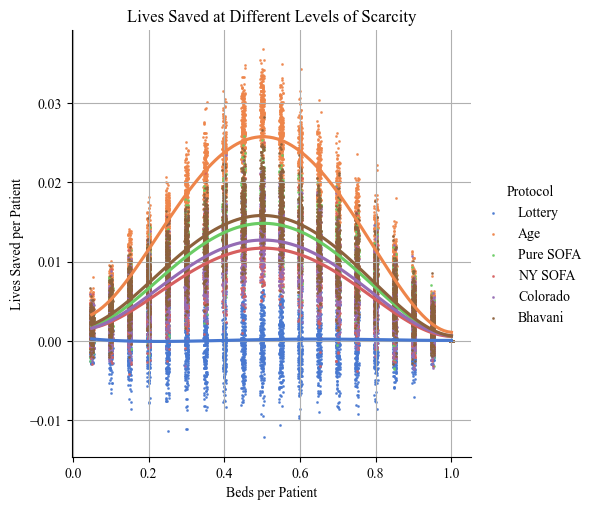

In [6]:
protocol_order=['Lottery', 'Age', 'Pure SOFA', 'NY SOFA', 'Colorado', 'Bhavani']

#Lives Saved Rate GRAPHS
plot1a = sns.lmplot(x="Capacity", y="LS_rate", 
                    hue="Protocol", 
                    #col='Protocol',
                    #col_order=protocol_order, 
                    #col_wrap=3, 
                    hue_order=protocol_order,
                    data=stats_overall_All,
                    order=4,
                    x_jitter=0.005,
    scatter_kws={"s": 1},
    palette='muted' 
)
plot1a.set(title='Lives Saved at Different Levels of Scarcity', xlabel="Beds per Patient", ylabel="Lives Saved per Patient")
plt.show()

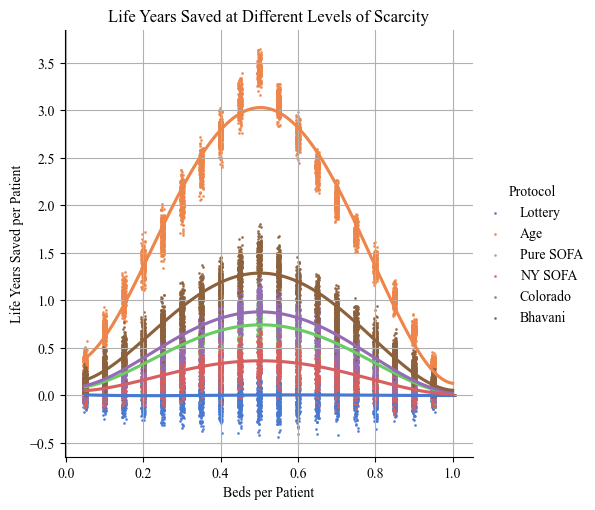

In [7]:
protocol_order=['Lottery', 'Age', 'Pure SOFA', 'NY SOFA', 'Colorado', 'Bhavani']

#Lives Saved Rate GRAPHS
plot2a = sns.lmplot(x="Capacity", y="YLS_Cho_rate", 
                    hue="Protocol", 
                    #col='Protocol',
                    #col_order=protocol_order, 
                    #col_wrap=3, 
                    hue_order=protocol_order,
                    data=stats_Cho_overall_All,
                    order=4,
                    x_jitter=0.005,
    scatter_kws={"s": 1},
    palette='muted' 
)
plot2a.set(title='Life Years Saved at Different Levels of Scarcity', xlabel="Beds per Patient", ylabel="Life Years Saved per Patient")
plt.show()